In [1]:
import numpy as np
#import pylandau
from scipy.stats import moyal
from scipy.stats import norm
from matplotlib import pyplot as plt
#plt.style.use('tdrstyle.mplstyle')

In [2]:
#First energy loss in 3m of iron, as per PDG. Estimate peak offset and scale from PDG plot
MuonEinc = 1000
ELossAvFe = 24
PeakOffsetFe = ELossAvFe/2.875
ScaleLossFe = 2.5
xmax = 25.0
xmin = -5
dx = 0.01
nx = (xmax-xmin)/dx

In [3]:
x_landau = np.arange(xmin, xmax, dx)
#y_landau = pylandau.landau(x_landau)

In [4]:
#plt.plot(x_landau, y_landau, 'b')
#plt.title('Landau Dist, mu=0, c=Pi/2')
#plt.show()

In [5]:
#ELossY = y_landau
ELossX = x_landau*ScaleLossFe+PeakOffsetFe
MuonP = MuonEinc-ELossX

In [6]:
#plt.plot(ELossX, ELossY, 'b')

In [7]:
#plt.plot(MuonP, ELossY, 'b')
#plt.title('1 TeV Muon after 3m Iron')
#plt.show()

In [8]:
# Now Tungsten 6m
MuonEinc = 1000
#ELossAvW = 116 # this was only scaling by density, should be by X0
ELossAvW = 180 # Use Geant4 value
#PeakOffsetW = ELossAvW/2.875
PeakOffsetW = ELossAvW/2.875*1.5 # Adjust to roughly match Geant4
ScaleLossW = ScaleLossFe*ELossAvW/ELossAvFe

In [9]:
ELossX = x_landau*ScaleLossW+PeakOffsetW
MuonP = MuonEinc-ELossX

In [10]:
#plt.plot(MuonP, ELossY, 'b')
#plt.title('1 TeV Muon after 6m Tungsten')
#plt.show()

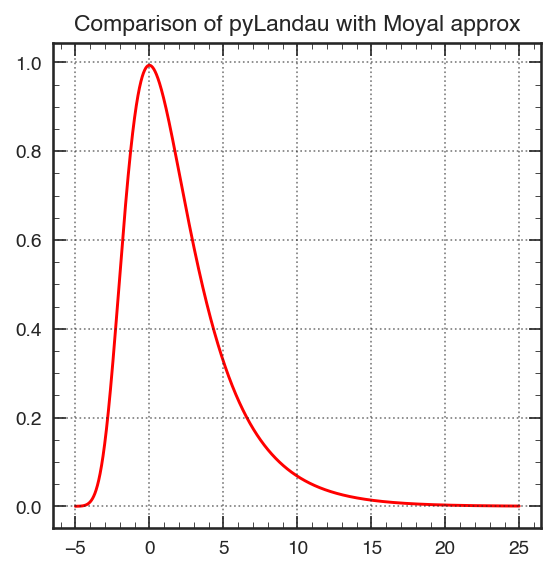

In [11]:
plt.plot(x_landau, moyal.pdf(x_landau,0,1.5708)*6.45,'r')
#plt.plot(x_landau, y_landau, 'b')
plt.title('Comparison of pyLandau with Moyal approx')
plt.show()

In [12]:
ELossX = x_landau*ScaleLossFe+PeakOffsetFe
MuonP = MuonEinc-ELossX
ELossY = moyal.pdf(x_landau,0,1.5704)*6.45

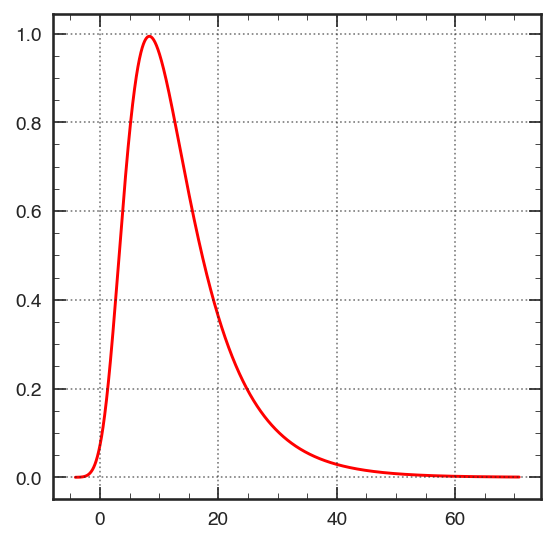

In [13]:
plt.plot(ELossX, ELossY, 'r')

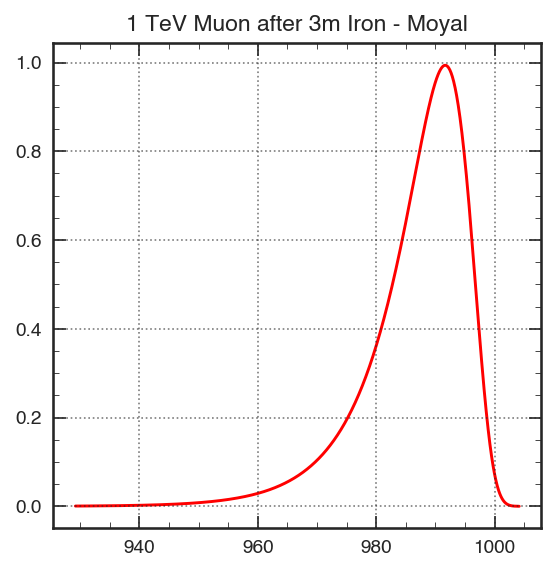

In [14]:
plt.plot(MuonP, ELossY, 'r')
plt.title('1 TeV Muon after 3m Iron - Moyal')
plt.show()

In [15]:
# Now Tungsten 6m
MuonEinc = 1000
#ELossAvW = 116 # this was only scaling by density, should be by X0
ELossAvW = 180 # Use Geant4 value
#PeakOffsetW = ELossAvW/2.875
PeakOffsetW = ELossAvW/2.875*1.5 # Adjust to roughly match Geant4
ScaleLossW = ScaleLossFe*ELossAvW/ELossAvFe

In [16]:
ELossX = x_landau*ScaleLossW+PeakOffsetW
MuonP = MuonEinc-ELossX

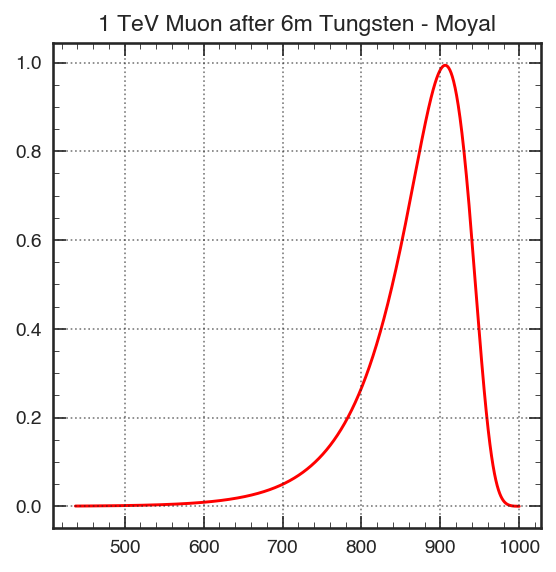

In [17]:
plt.plot(MuonP, ELossY, 'r')
plt.title('1 TeV Muon after 6m Tungsten - Moyal')
plt.show()

In [18]:
# MC Trials
Ntrial = 4000

In [19]:
rv = moyal()
r = moyal.rvs(loc=PeakOffsetW, scale=1.5704*ScaleLossW, size=Ntrial)

In [20]:
Emuon = MuonEinc-r
lower =500
upper = 1000
fit_i = 830
fit_f = 950
fit = Emuon[(Emuon >= fit_i) & (Emuon <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Emuon)

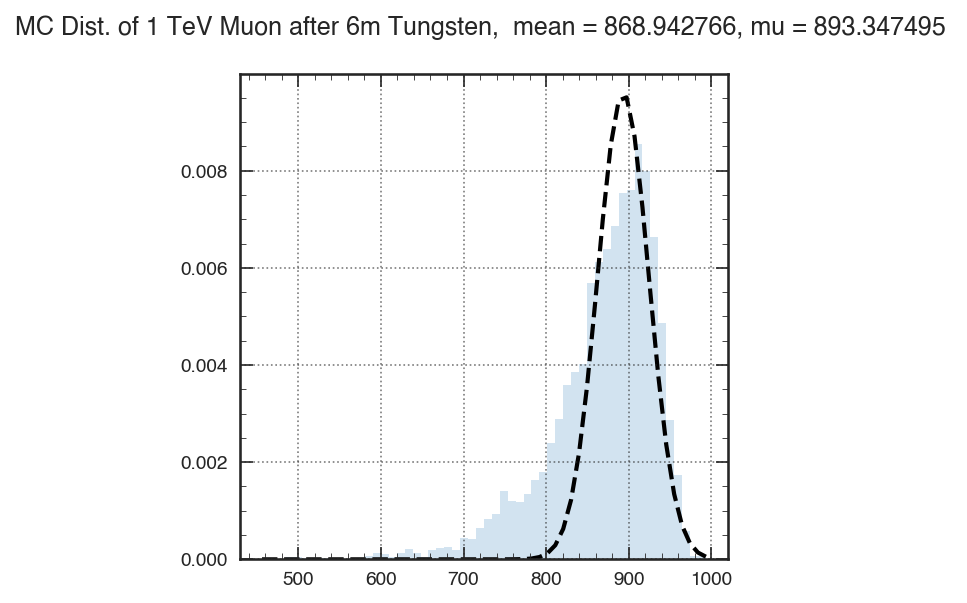

In [21]:
n, bins, patches = plt.hist(Emuon, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('MC Dist. of 1 TeV Muon after 6m Tungsten,  mean = %f, mu = %f \n' %(mean,mu), fontsize=12)
plt.show()
# let's choose peak of scattered energy as most probable value for determing most probable energy loss
Eloss1000 = MuonEinc - mu

In [22]:
def Q2Lepton(E, Theta, Elep, Ehad):
    return 2*E*Elep*(1+np.cos(Theta))

In [23]:
def YLepton(E, Theta, Elep, Ehad):
    return 1 - E/(2*Elep)*(1-np.cos(Theta))

In [24]:
def Eta(Theta):
    return -np.log(np.tan(Theta/2))

In [25]:
Q2true = Q2Lepton(900., 3.136635, 1000, 275)

In [26]:
Ytrue = YLepton(900., 3.136635, 1000, 275)

In [27]:
# Let's subtract energy loss but correct back by the most probably energy loss (so smearing only)
Escatt900 = 900-r + Eloss1000

In [28]:
# Calculate Q2 from random energy loss, but not yet any smearing from multiple scattering or from measured muon momentum...
Q2scatt900 = Q2Lepton(Escatt900,3.136635, 1000, 275)

In [29]:
lower =15
upper = 25
fit_i = 21
fit_f = 25.0
fit = Q2scatt900[(Q2scatt900 >= fit_i) & (Q2scatt900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt900)


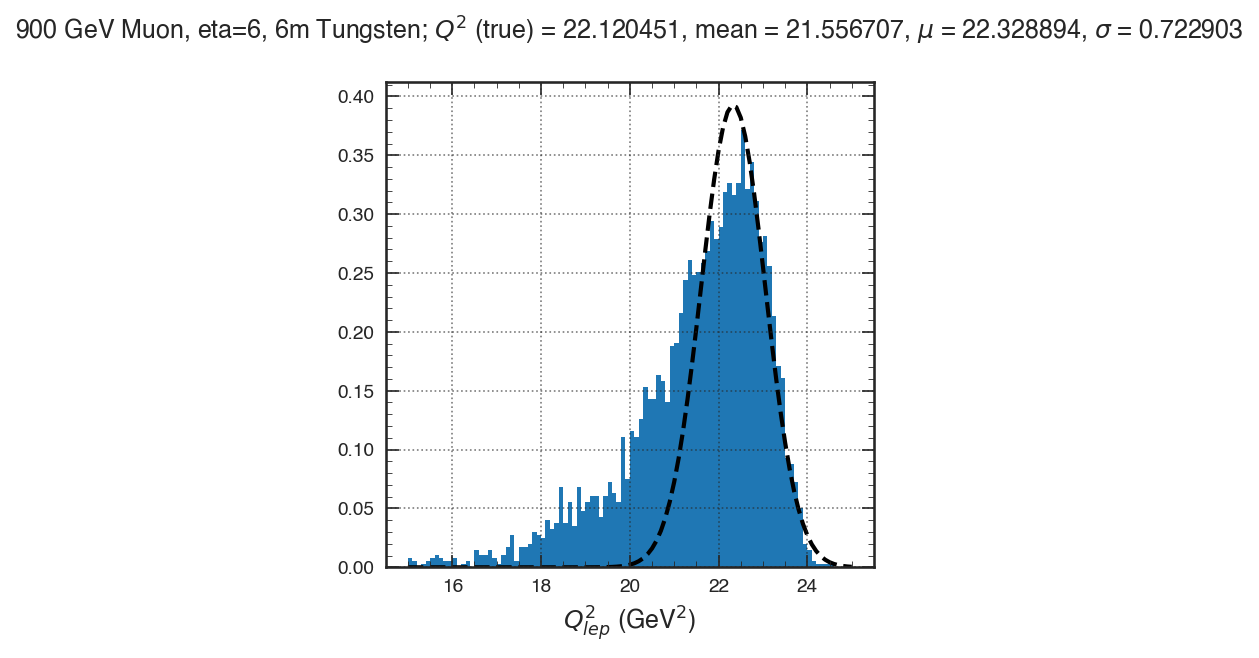

Q2 resolution = %f 0.03237521602119185


In [30]:
n, bins, patches = plt.hist(Q2scatt900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('900 GeV Muon, eta=6, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f, $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [31]:
Q2true = Q2Lepton(500., 3.136635, 1000, 275)

In [32]:
Ytrue = YLepton(500., 3.136635, 1000, 275)

In [33]:
# Assume same energy loss, but it will be a bit less as further down ionization curve. ~25% ?
# let's correct back most probably Eloss
Escatt500 = 500-r + Eloss1000

In [34]:
Q2scatt500 = Q2Lepton(Escatt500,3.136635, 1000, 275)

In [35]:
lower =5
upper = 15
fit_i = 11
fit_f = 15.0
fit = Q2scatt500[(Q2scatt500 >= fit_i) & (Q2scatt500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt500)


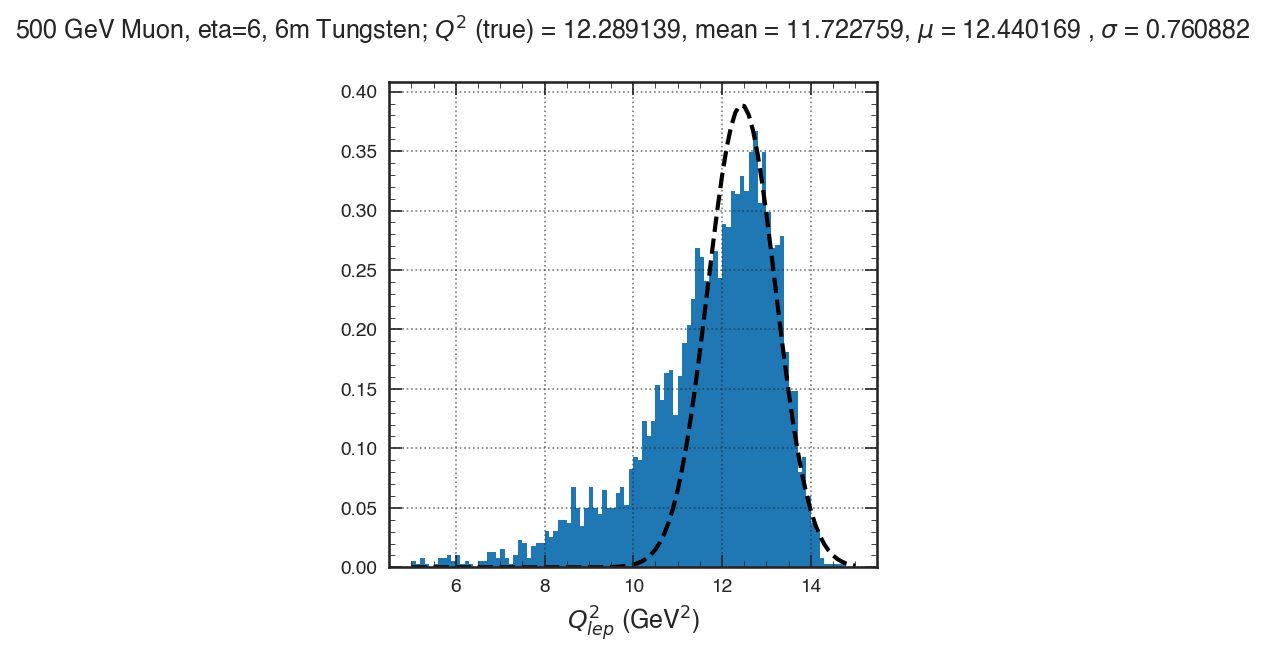

Q2 resolution = %f 0.0611633256197326


In [36]:
n, bins, patches = plt.hist(Q2scatt500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('500 GeV Muon, eta=6, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mean,mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [37]:
# Now multiple scattering in 6m of Tungsten

In [38]:
SigmaTheta900 = 0.000802392 # 900 GeV

In [39]:
SigmaTheta500 = 0.001444305 # 500 GeV

In [40]:
Th900 = np.random.normal(3.136635, SigmaTheta900, Ntrial)

In [41]:
Th500 = np.random.normal(3.136635, SigmaTheta500, Ntrial)

In [42]:
eta500 = Eta(Th500)
eta900 = Eta(Th900)

/var/folders/qb/dyk63sq96gs3fzj7h8qdcfvm0000gn/T/ipykernel_80626/2057946535.py:2: RuntimeWarning: invalid value encountered in log
  return -np.log(np.tan(Theta/2))


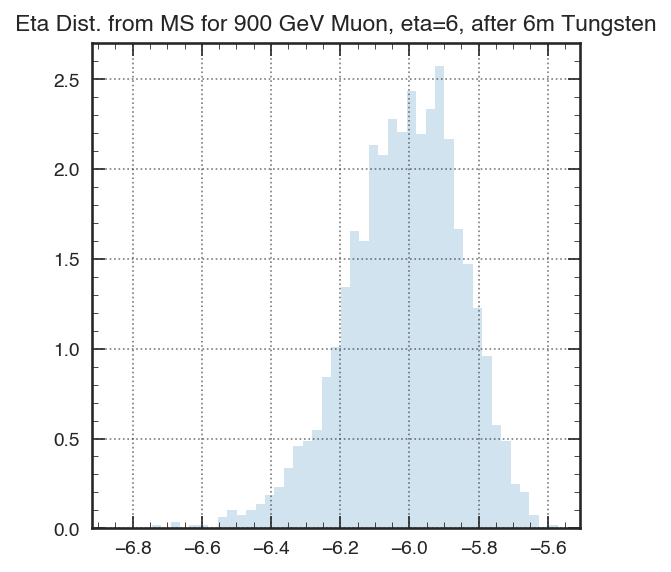

In [43]:
plt.hist(eta900, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('Eta Dist. from MS for 900 GeV Muon, eta=6, after 6m Tungsten')
plt.show()

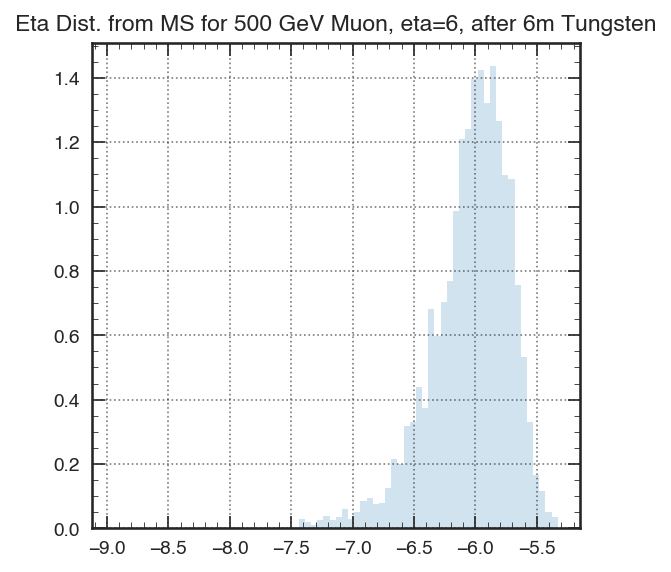

In [44]:
plt.hist(eta500, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('Eta Dist. from MS for 500 GeV Muon, eta=6, after 6m Tungsten')
plt.show()

In [45]:
Q2true = Q2Lepton(900., 3.136635, 1000, 275)
Q2plus = Q2Lepton(900., 3.136635-2.*SigmaTheta900, 1000, 275)
Q2minus = Q2Lepton(900., 3.136635+2.*SigmaTheta900, 1000, 275)
Ytrue = YLepton(900., 3.136635, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)


Q2 true = 22.120450897800126  Ytrue =  0.1000055301127244
2 sigma MS window: Q2- =  10.117551559352123  Q2+ = 38.75888930984228


In [46]:
# Calculate Q2 with random energy loss and multiple scattering, but no smearing of measured muon momentum...
## without energy loss:
##Escatt900 = 900
Q2scatt900 = Q2Lepton(Escatt900,Th900, 1000, 275)

In [47]:
lower =0
upper = 50
fit_i = 5
fit_f = 35.0
fit = Q2scatt900[(Q2scatt900 >= fit_i) & (Q2scatt900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt900)

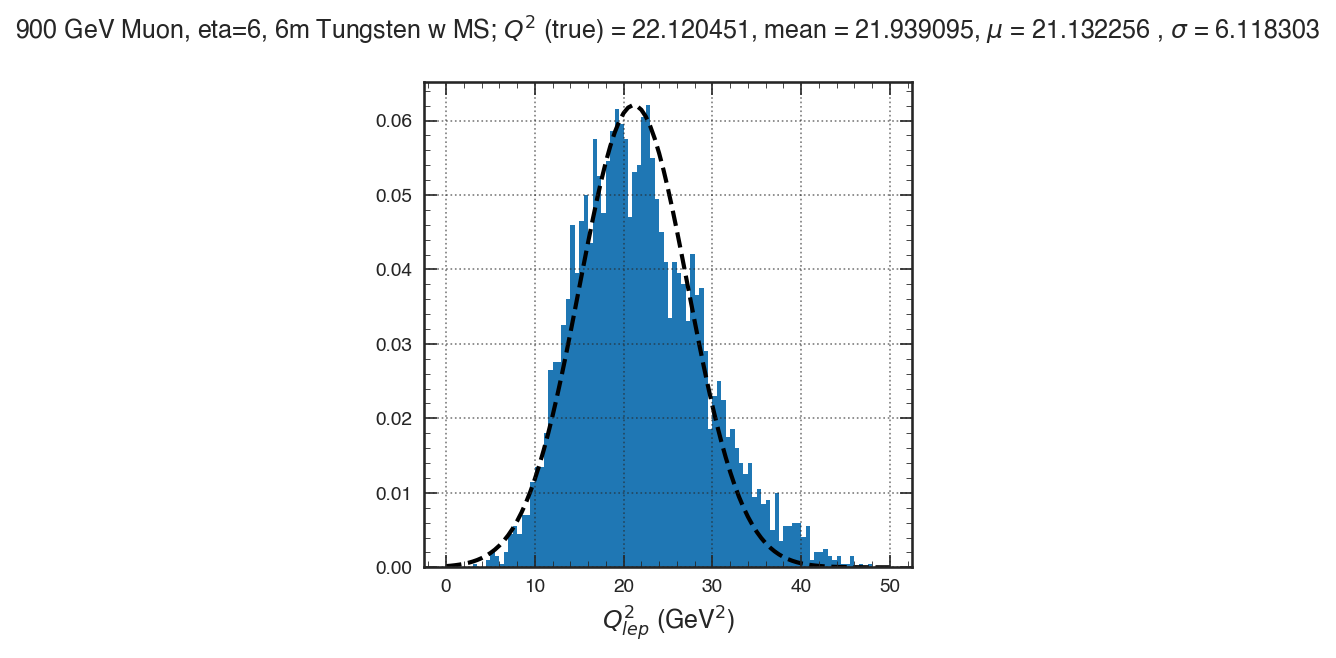

Q2 resolution = %f 0.2895243877670061


In [48]:
n, bins, patches = plt.hist(Q2scatt900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('900 GeV Muon, eta=6, 6m Tungsten w MS; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mean,mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [49]:
Q2true = Q2Lepton(500., 3.136635, 1000, 275)
Q2plus = Q2Lepton(500., 3.136635-2.*SigmaTheta500, 1000, 275)
Q2minus = Q2Lepton(500., 3.136635+2.*SigmaTheta500, 1000, 275)
Ytrue = YLepton(500., 3.136635, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)


Q2 true = 12.289139387666737  Ytrue =  0.500003072284847
2 sigma MS window: Q2- =  2.140469924638566  Q2+ = 30.78176823945178


In [50]:
Q2scatt500 = Q2Lepton(Escatt500,Th500, 1000, 275)

In [51]:
lower =0
upper = 50
fit_i = 0
fit_f = 25.0
fit = Q2scatt500[(Q2scatt500 >= fit_i) & (Q2scatt500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt500)

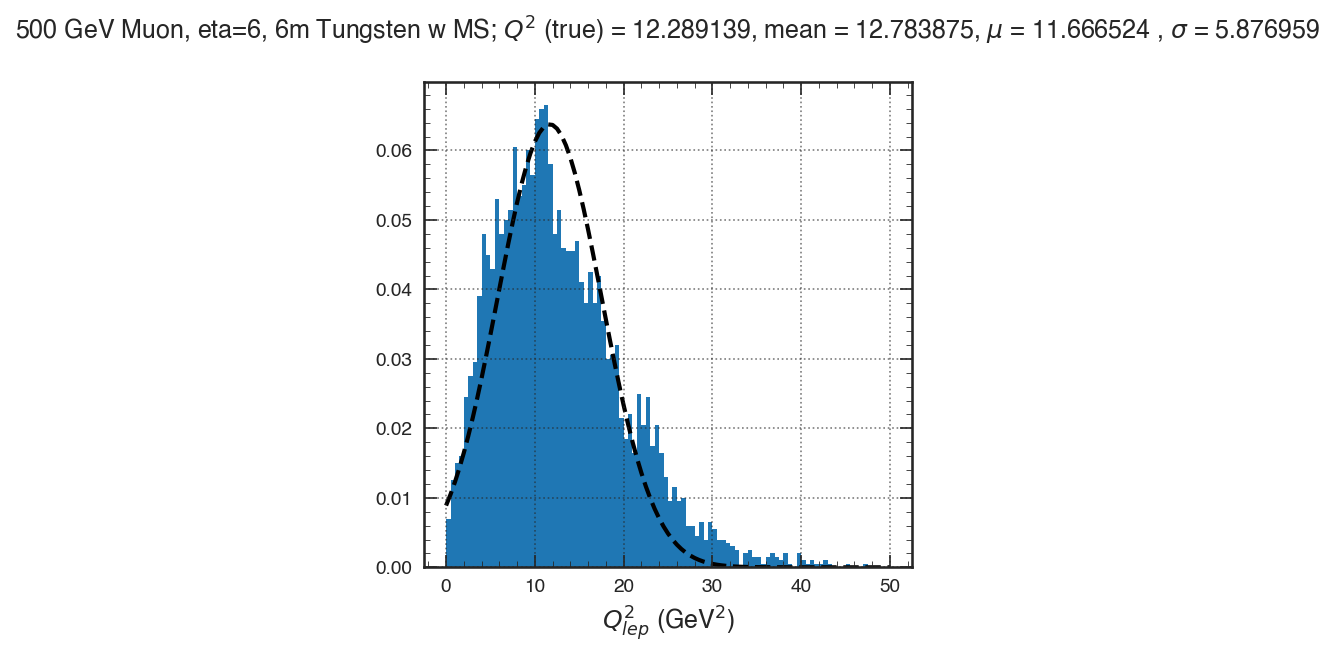

Q2 resolution = %f 0.5037455503263141


In [52]:
n, bins, patches = plt.hist(Q2scatt500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('500 GeV Muon, eta=6, 6m Tungsten w MS; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mean,mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [53]:
# Angle smearing seems to have large impact than energy loss and smearing!

In [54]:
# eta = 5:
Q2true = Q2Lepton(900., 3.12812, 1000, 275)
Q2plus = Q2Lepton(900., 3.12812-2.*SigmaTheta900, 1000, 275)
Q2minus = Q2Lepton(900., 3.12812+2.*SigmaTheta900, 1000, 275)
Ytrue = YLepton(900., 3.12812, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)

Q2 true = 163.35868428434264  Ytrue =  0.10004083967107114
2 sigma MS window: Q2- =  126.7602079206398  Q2+ = 204.59233598619787


In [55]:
Th900 = np.random.normal(3.12812, SigmaTheta900, Ntrial)
Th500 = np.random.normal(3.12812, SigmaTheta500, Ntrial)
eta500 = Eta(Th500)
eta900 = Eta(Th900)

In [56]:
Q2scatt900 = Q2Lepton(Escatt900,Th900, 1000, 275)
Q2scatt500 = Q2Lepton(Escatt500,Th500, 1000, 275)

In [57]:
lower =75
upper = 250
fit_i = 100
fit_f = 200.0
fit = Q2scatt900[(Q2scatt900 >= fit_i) & (Q2scatt900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt900)

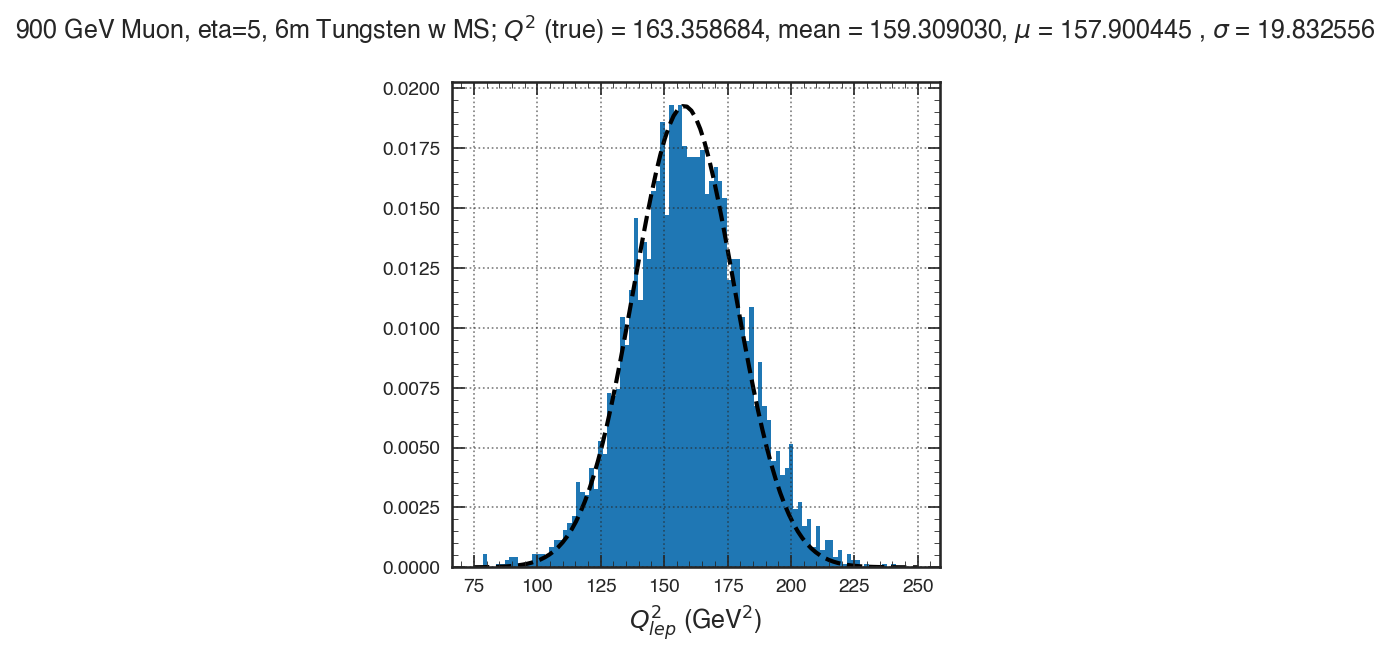

Q2 resolution = %f 0.12560164571819063


In [58]:
n, bins, patches = plt.hist(Q2scatt900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('900 GeV Muon, eta=5, 6m Tungsten w MS; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mean,mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [59]:
Q2true = Q2Lepton(500., 3.12812, 1000, 275)
Q2plus = Q2Lepton(500., 3.12812-2.*SigmaTheta500, 1000, 275)
Q2minus = Q2Lepton(500., 3.12812+2.*SigmaTheta500, 1000, 275)
Ytrue = YLepton(500., 3.12812, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)


Q2 true = 90.75482460241258  Ytrue =  0.5000226887061506
2 sigma MS window: Q2- =  56.01046648540109  Q2+ = 133.84248738557147


In [60]:
lower =0
upper = 150
fit_i = 25
fit_f = 125.0
fit = Q2scatt500[(Q2scatt500 >= fit_i) & (Q2scatt500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt500)

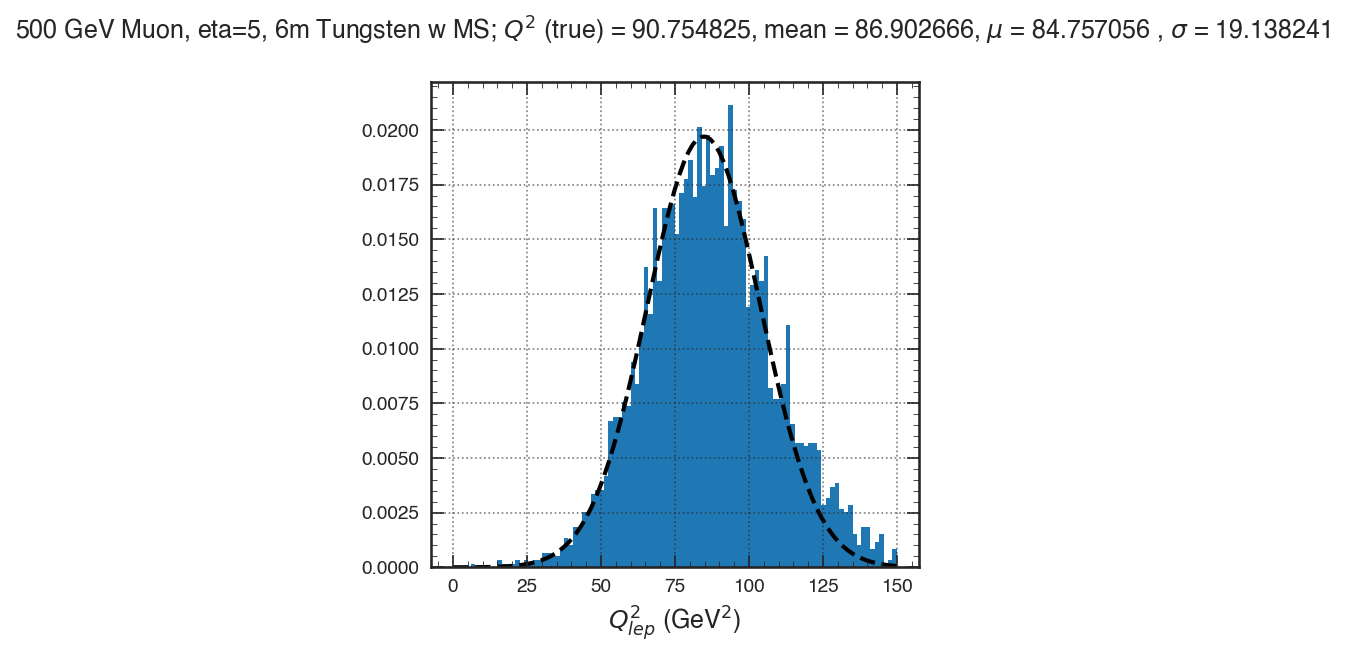

Q2 resolution = %f 0.22580115454259983


In [61]:
n, bins, patches = plt.hist(Q2scatt500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('500 GeV Muon, eta=5, 6m Tungsten w MS; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mean,mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [62]:
# eta = 4:
Q2true = Q2Lepton(900., 3.1050, 1000, 275)
Q2plus = Q2Lepton(900., 3.10502-2.*SigmaTheta900, 1000, 275)
Q2minus = Q2Lepton(900., 3.1050+2.*SigmaTheta900, 1000, 275)
Ytrue = YLepton(900., 3.1050, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)

Q2 true = 1204.9855995168946  Ytrue =  0.10030124639987925
2 sigma MS window: Q2- =  1101.6235302464538  Q2+ = 1311.6057479420017


In [63]:
Th900 = np.random.normal(3.1050, SigmaTheta900, Ntrial)
Th500 = np.random.normal(3.1050, SigmaTheta500, Ntrial)
eta500 = Eta(Th500)
eta900 = Eta(Th900)

In [64]:
Q2scatt900 = Q2Lepton(Escatt900,Th900, 1000, 275)
Q2scatt500 = Q2Lepton(Escatt500,Th500, 1000, 275)

In [65]:
lower =800
upper = 1500
fit_i = 1050
fit_f = 1300.0
fit = Q2scatt900[(Q2scatt900 >= fit_i) & (Q2scatt900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt900)

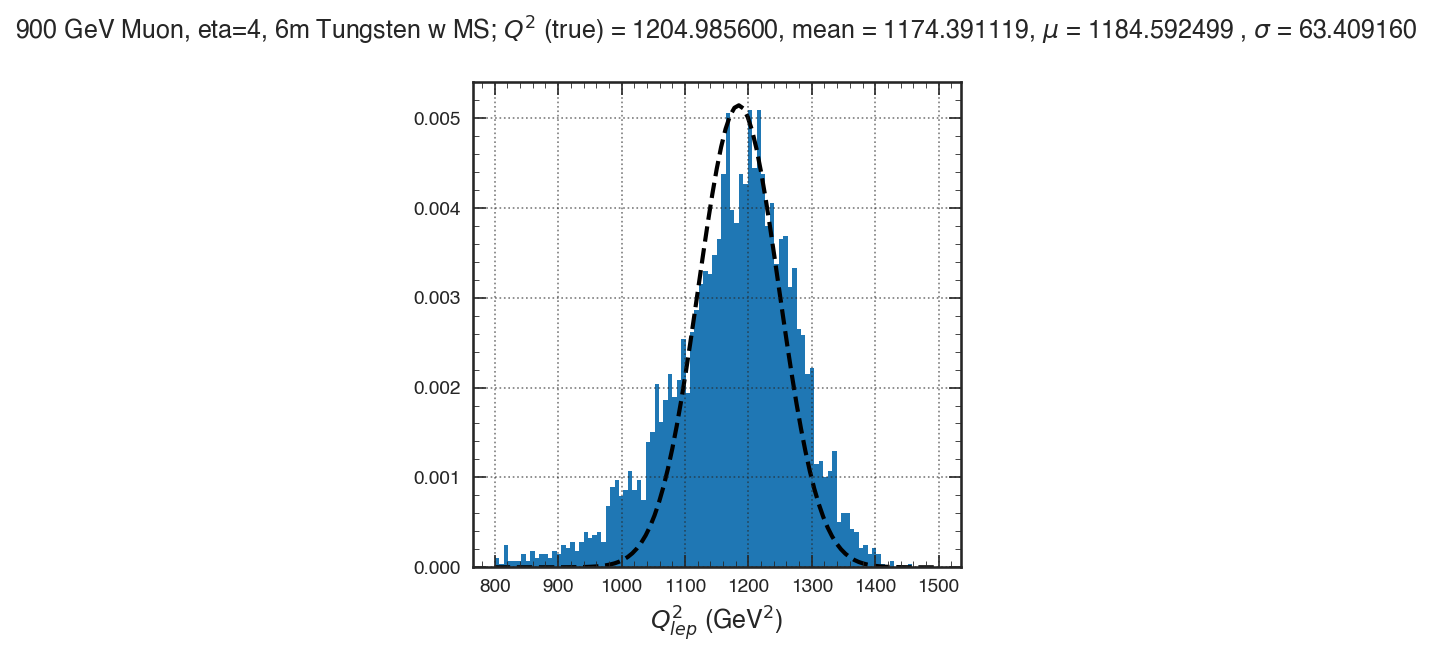

Q2 resolution = %f 0.05352824695019652


In [66]:
n, bins, patches = plt.hist(Q2scatt900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('900 GeV Muon, eta=4, 6m Tungsten w MS; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [67]:
Q2true = Q2Lepton(500., 3.1050, 1000, 275)
Q2plus = Q2Lepton(500., 3.1050-2.*SigmaTheta500, 1000, 275)
Q2minus = Q2Lepton(500., 3.1050+2.*SigmaTheta500, 1000, 275)
Ytrue = YLepton(500., 3.11050, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)


Q2 true = 669.4364441760525  Ytrue =  0.5001208344031833
2 sigma MS window: Q2- =  567.9275120653582  Q2+ = 779.283852397783


In [68]:
lower =300
upper = 900
fit_i = 500
fit_f = 750
fit = Q2scatt500[(Q2scatt500 >= fit_i) & (Q2scatt500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt500)

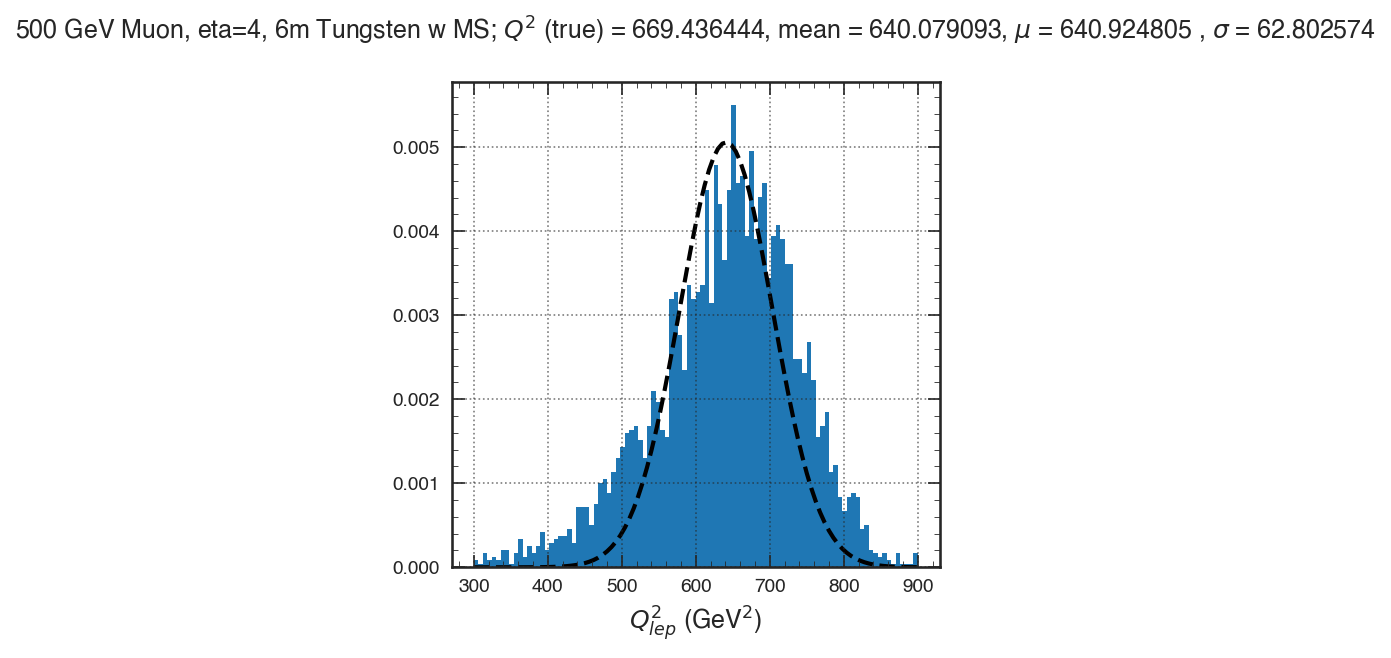

Q2 resolution = %f 0.09798742984410698


In [69]:
n, bins, patches = plt.hist(Q2scatt500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('500 GeV Muon, eta=4, 6m Tungsten w MS; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mean,mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [70]:
# eta = 3:
Q2true = Q2Lepton(900., 3.0421, 1000, 275)
Q2plus = Q2Lepton(900., 3.0421-2.*SigmaTheta900, 1000, 275)
Q2minus = Q2Lepton(900., 3.0421+2.*SigmaTheta900, 1000, 275)
Ytrue = YLepton(900., 3.0421, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)

Q2 true = 8901.562780466988  Ytrue =  0.10222539069511671
2 sigma MS window: Q2- =  8616.94755599096  Q2+ = 9190.790676512517


In [71]:
Th900 = np.random.normal(3.0421, SigmaTheta900, Ntrial)
Th500 = np.random.normal(3.0421, SigmaTheta500, Ntrial)
eta500 = Eta(Th500)
eta900 = Eta(Th900)

In [72]:
Q2scatt900 = Q2Lepton(Escatt900,Th900, 1000, 275)
Q2scatt500 = Q2Lepton(Escatt500,Th500, 1000, 275)

In [73]:
lower =6000
upper = 10000
fit_i = 8400
fit_f = 9400.0
fit = Q2scatt900[(Q2scatt900 >= fit_i) & (Q2scatt900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt900)

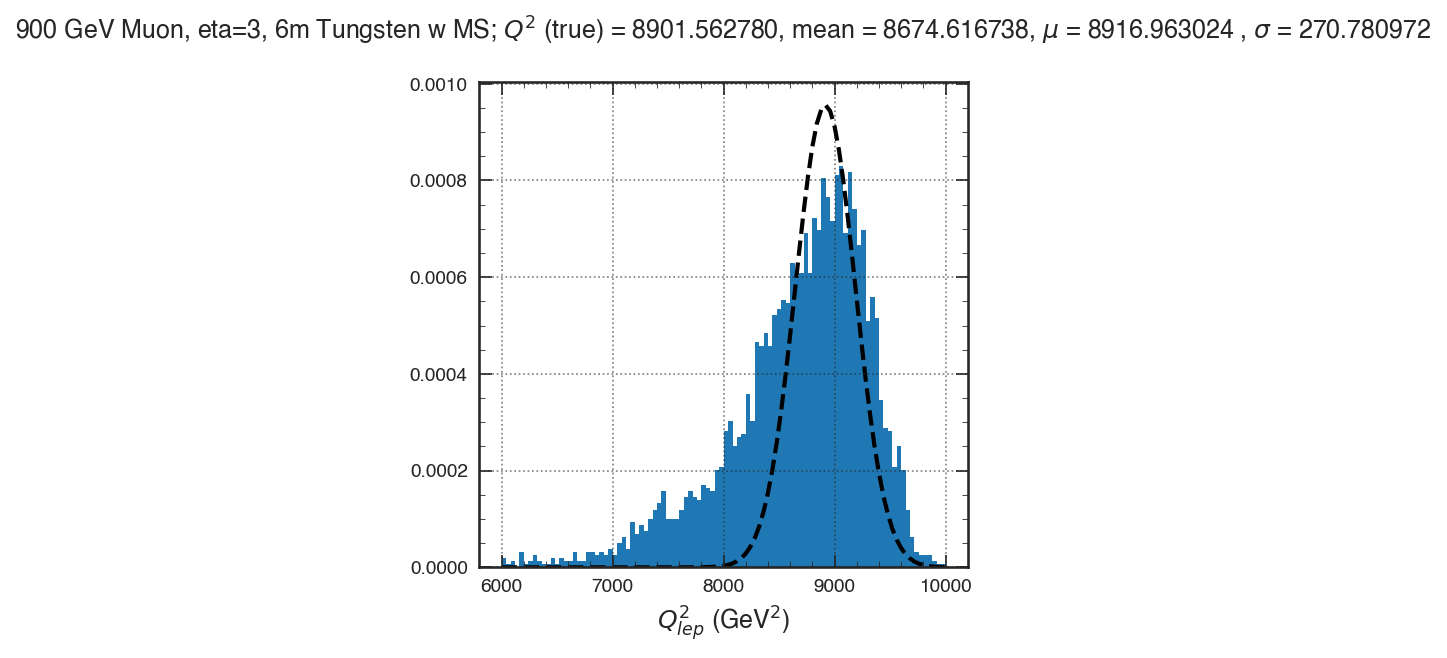

Q2 resolution = %f 0.030366950180797384


In [74]:
n, bins, patches = plt.hist(Q2scatt900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('900 GeV Muon, eta=3, 6m Tungsten w MS; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mean,mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [75]:
Q2true = Q2Lepton(500., 3.0421, 1000, 275)
Q2plus = Q2Lepton(500., 3.0421-2.*SigmaTheta500, 1000, 275)
Q2minus = Q2Lepton(500., 3.0421+2.*SigmaTheta500, 1000, 275)
Ytrue = YLepton(500., 3.0421, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)


Q2 true = 4945.3126558149925  Ytrue =  0.5012363281639538
2 sigma MS window: Q2- =  4662.542889578458  Q2+ = 5236.385219986706


In [76]:
lower =2000
upper = 6000
fit_i = 4400
fit_f = 5400
fit = Q2scatt500[(Q2scatt500 >= fit_i) & (Q2scatt500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt500)

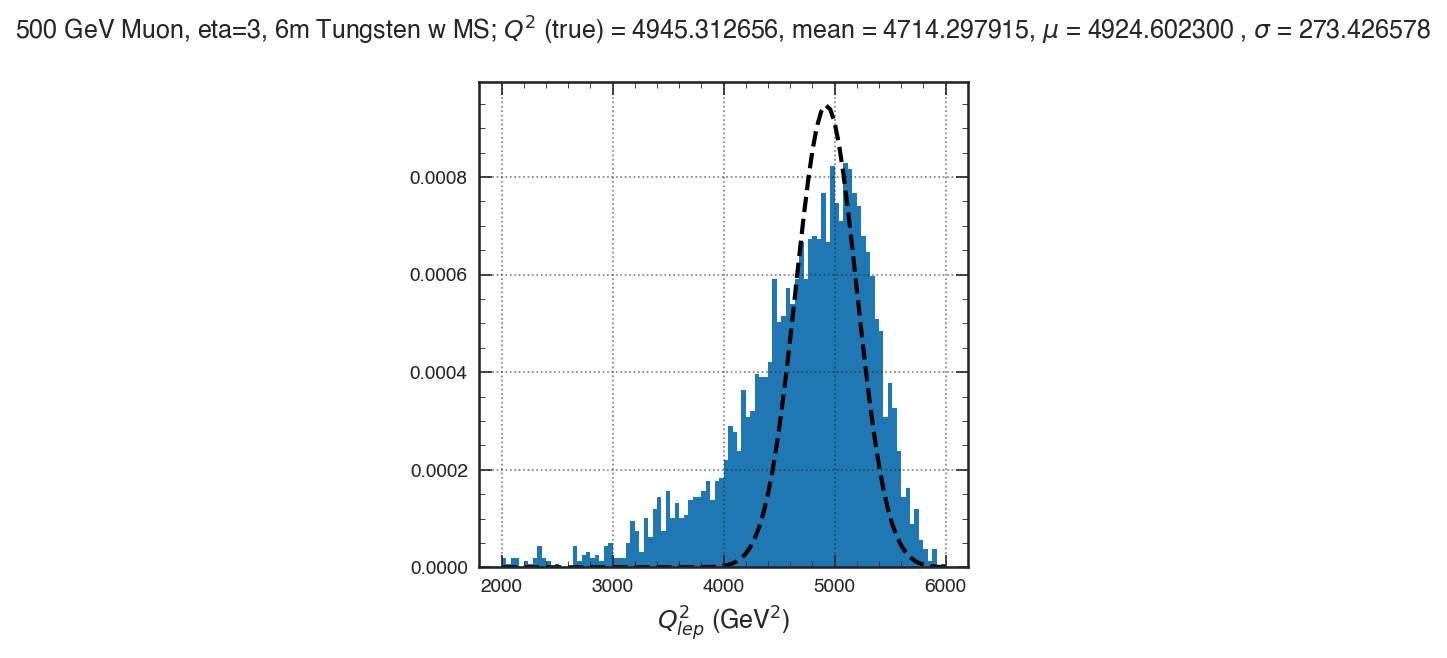

Q2 resolution = %f 0.05552257033881107


In [77]:
n, bins, patches = plt.hist(Q2scatt500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('500 GeV Muon, eta=3, 6m Tungsten w MS; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mean,mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [78]:
# Now let's try a different way to get at the scattered muon energy from hadronic system using E-Pz

In [79]:
# 1 TeV incident muon, 900 GeV scattered muon, eta = -6, Sigma is E-pz for hadron system
Sigma = 2*(1000-900)

In [80]:
# Now smear this value using 25% energy resolution
Resolution = 0.25
Sig900 = np.random.normal(Sigma, Resolution*Sigma, Ntrial)

(array([8.73727429e-05, 8.73727429e-05, 2.62118229e-04, 2.03869733e-04,
        5.24236457e-04, 7.28106191e-04, 7.28106191e-04, 1.01934867e-03,
        1.68920636e-03, 2.32993981e-03, 2.59205804e-03, 3.43666122e-03,
        3.96089768e-03, 5.67922829e-03, 6.43645873e-03, 6.93157094e-03,
        6.66945271e-03, 7.57230438e-03, 7.83442261e-03, 7.36843465e-03,
        7.68880138e-03, 7.04806793e-03, 6.46558297e-03, 6.49470722e-03,
        4.92199785e-03, 4.42688564e-03, 3.46578547e-03, 2.79592777e-03,
        2.03869733e-03, 1.57270937e-03, 1.01934867e-03, 7.86354686e-04,
        5.53360705e-04, 4.07739467e-04, 3.20366724e-04, 1.45621238e-04,
        8.73727429e-05, 5.82484953e-05, 0.00000000e+00, 2.91242476e-05,
        2.91242476e-05]),
 array([ 36.9223463 ,  45.50625903,  54.09017176,  62.67408449,
         71.25799722,  79.84190995,  88.42582268,  97.00973541,
        105.59364813, 114.17756086, 122.76147359, 131.34538632,
        139.92929905, 148.51321178, 157.09712451, 165.68103724

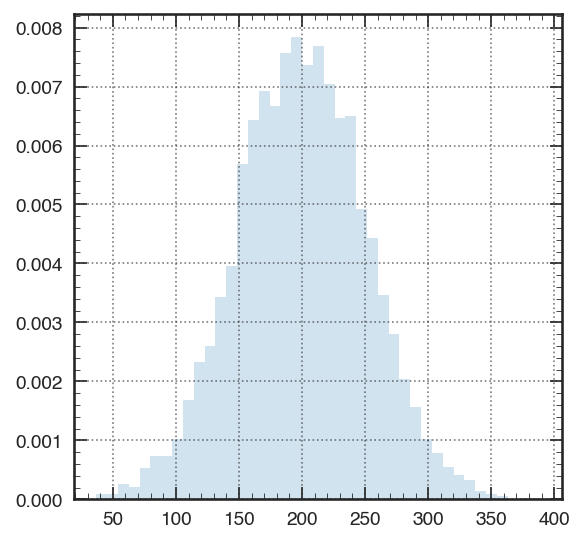

In [81]:
plt.hist(Sig900, density=True, bins='auto', histtype='stepfilled', alpha=0.2)

In [82]:
EmuSigma900 = 0.5*(2*1000-Sig900)

In [83]:
lower =800
upper = 1000
fit_i = 850
fit_f = 950
fit = EmuSigma900[(EmuSigma900 >= fit_i) & (EmuSigma900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(EmuSigma900)

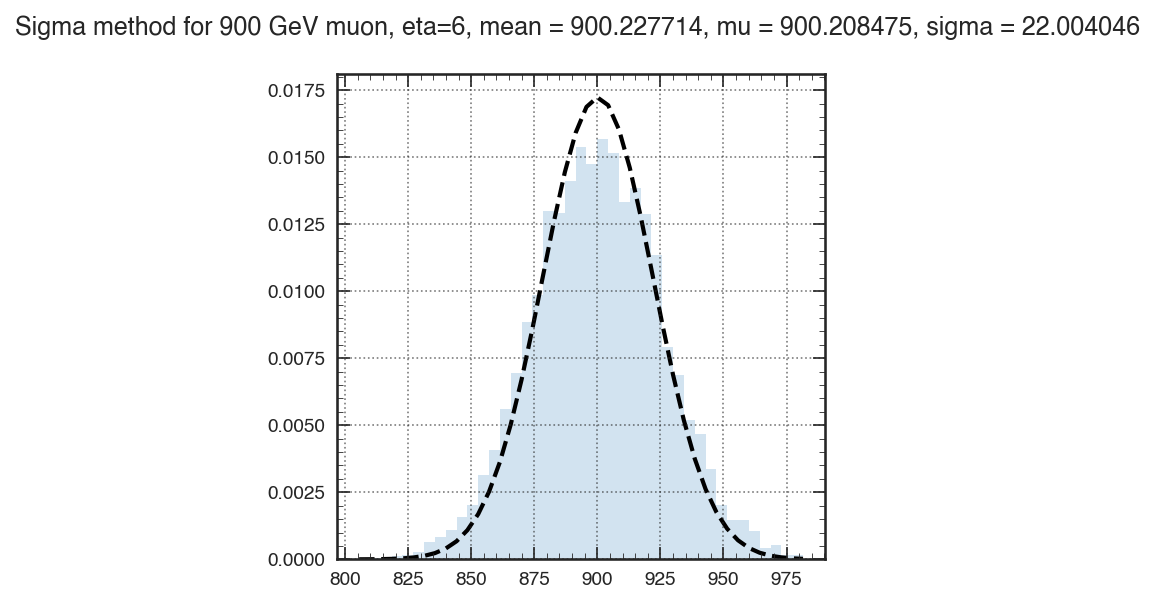

In [84]:
n, bins, patches = plt.hist(EmuSigma900, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('Sigma method for 900 GeV muon, eta=6, mean = %f, mu = %f, sigma = %f \n' %(mean,mu,sigma), fontsize=12)
plt.show()

In [85]:
Q2true = Q2Lepton(900., 3.136635, 1000, 275)
Ytrue = YLepton(900., 3.136635, 1000, 275)

In [86]:
# with angle smearing
Th900 = np.random.normal(3.136635, SigmaTheta900, Ntrial)
Q2Sigma900 = Q2Lepton(EmuSigma900,Th900, 1000, 275)

In [87]:
lower = 0
upper = 50
fit_i = 10
fit_f = 35.0
fit = Q2Sigma900[(Q2Sigma900 >= fit_i) & (Q2Sigma900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2Sigma900)

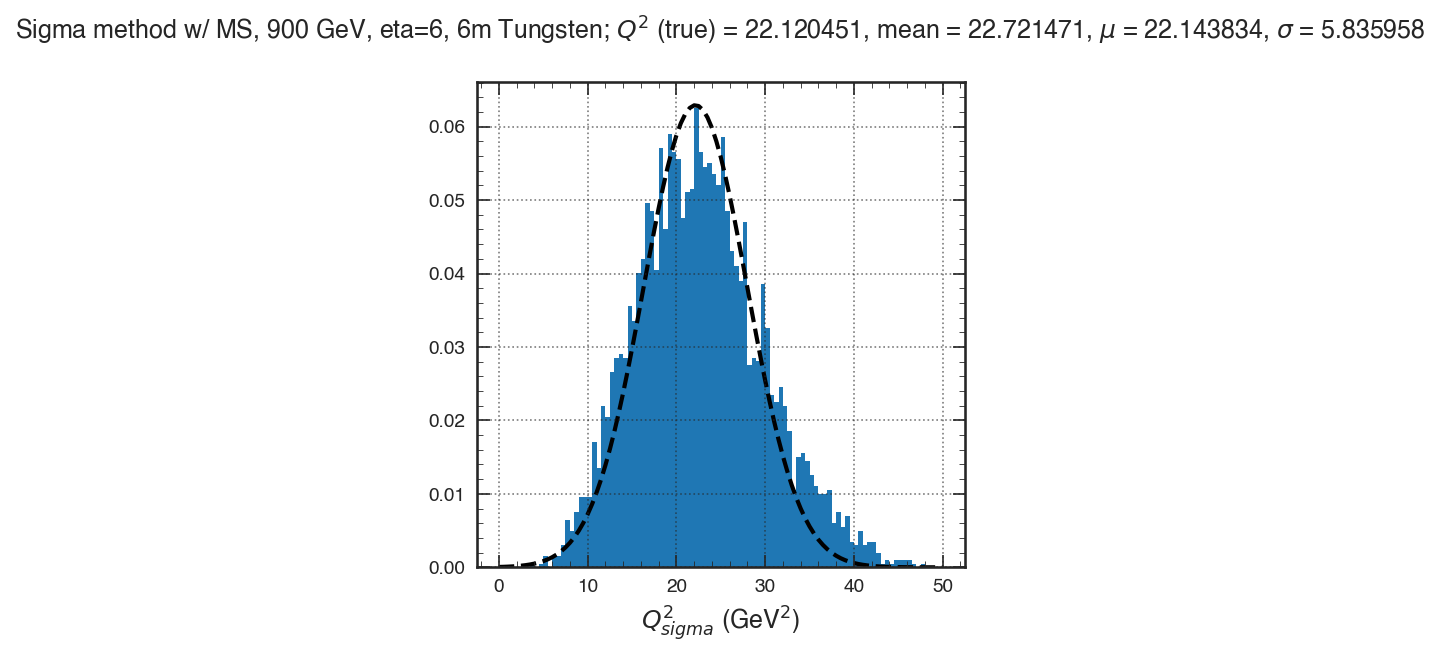

Q2 resolution = %f 0.2635477652593554


In [88]:
n, bins, patches = plt.hist(Q2Sigma900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('Sigma method w/ MS, 900 GeV, eta=6, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f, $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{sigma}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [89]:
# very similar to muon variable case *without* any muon momentum smearing
# dominated by angular smearing though

In [90]:
# Now change to 500 GeV scattered muon, eta = -6
# 1 TeV incident muon, 500 GeV scattered muon, Sigma is E-pz for hadron system
Sigma = 2*(1000-500)

In [91]:
# Now smear this value using 25% energy resolution
Resolution = 0.25
Sig500 = np.random.normal(Sigma, Resolution*Sigma, Ntrial)

In [92]:
EmuSigma500 = 0.5*(2*1000-Sig500)

In [93]:
Q2true = Q2Lepton(500., 3.136635, 1000, 275)
Ytrue = YLepton(500., 3.136635, 1000, 275)

In [94]:
# with angle smearing
Th500 = np.random.normal(3.136635, SigmaTheta500, Ntrial)
Q2Sigma500 = Q2Lepton(EmuSigma500,Th500, 1000, 275)

In [95]:
lower = 0
upper = 50
fit_i = 0
fit_f = 25.0
fit = Q2Sigma500[(Q2Sigma500 >= fit_i) & (Q2Sigma500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2Sigma500)

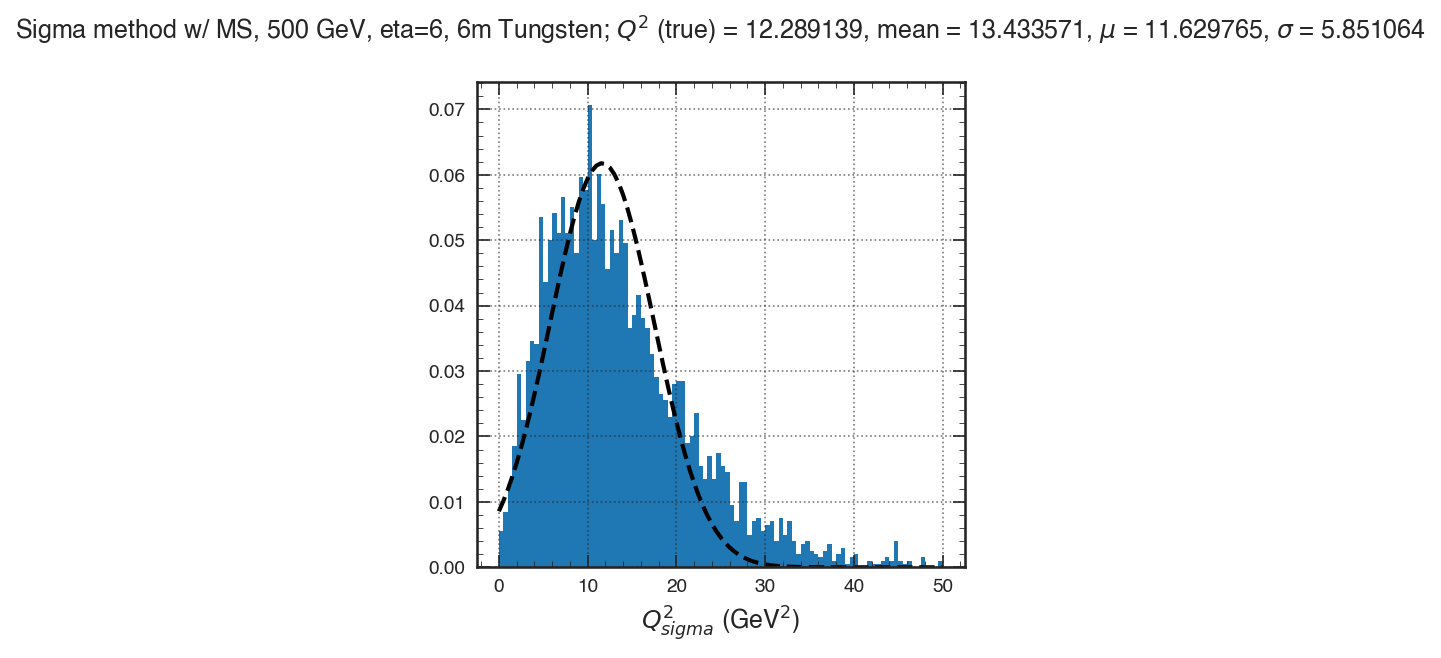

Q2 resolution = %f 0.5031111074165991


In [96]:
n, bins, patches = plt.hist(Q2Sigma500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('Sigma method w/ MS, 500 GeV, eta=6, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f, $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{sigma}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [97]:
# Again very similar to lepton method, without energy smearing.
# so 25% smearing of hadron E-pz gives equivalent performance to using muon with energy loss smearing (but no detector smearing)

In [98]:
# Now let's combine both methods for the energy measurement
# Skip multiple scattering for now, just energy loss to see if better
Ecombine900 = 0.5*(Escatt900+EmuSigma900)

In [99]:
Q2true = Q2Lepton(900., 3.136635, 1000, 275)
Ytrue = YLepton(900., 3.136635, 1000, 275)
Q2combine900 = Q2Lepton(Ecombine900, 3.136635, 1000, 275)

In [100]:
lower = 18
upper = 24
fit_i = 21
fit_f = 23.0
fit = Q2combine900[(Q2combine900 >= fit_i) & (Q2combine900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2combine900)

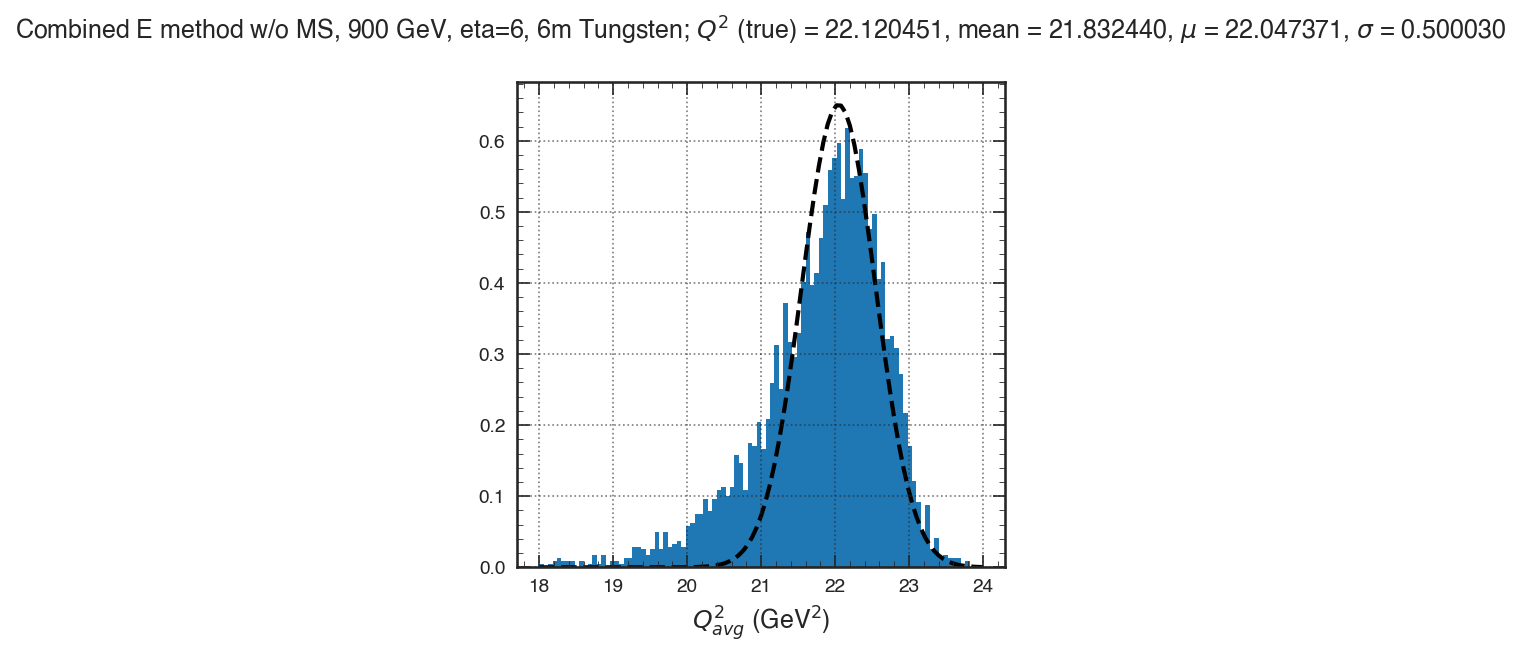

Q2 resolution = %f 0.022679783110765843


In [101]:
n, bins, patches = plt.hist(Q2combine900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('Combined E method w/o MS, 900 GeV, eta=6, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f, $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{avg}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [102]:
# So does get better averaging (not quite by sqrt{2}), but anyway dominated by angular scattering

In [103]:
# Now try eta=5, back w/ MS
Th900 = np.random.normal(3.12812, SigmaTheta900, Ntrial)
Th500 = np.random.normal(3.12812, SigmaTheta500, Ntrial)

In [104]:
Q2true = Q2Lepton(900., 3.12812, 1000, 275)
Q2Sigma900 = Q2Lepton(EmuSigma900,Th900, 1000, 275)

In [105]:
lower = 75
upper = 250
fit_i = 100
fit_f = 200.0
fit = Q2Sigma900[(Q2Sigma900 >= fit_i) & (Q2Sigma900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2Sigma900)

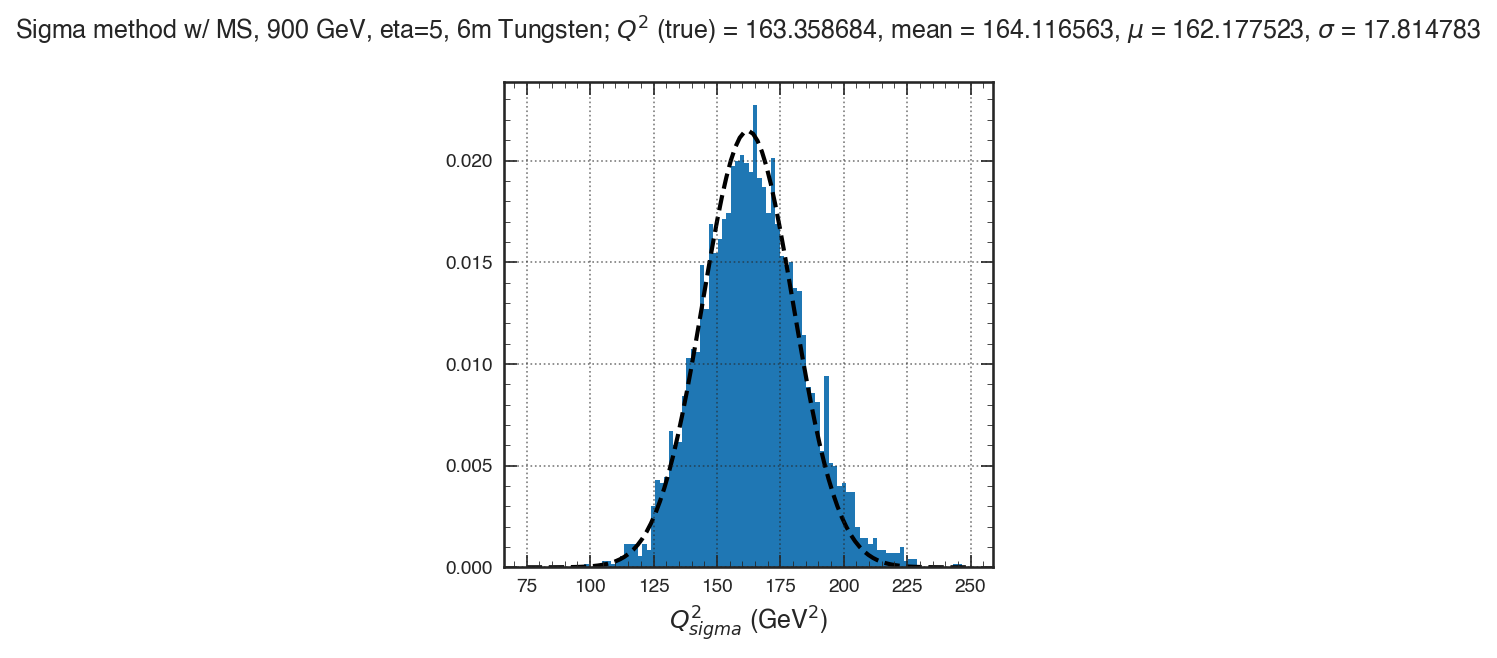

Q2 resolution = %f 0.10984742440466923


In [106]:
n, bins, patches = plt.hist(Q2Sigma900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('Sigma method w/ MS, 900 GeV, eta=5, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f, $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{sigma}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [107]:
Q2true = Q2Lepton(500., 3.12812, 1000, 275)
Q2Sigma500 = Q2Lepton(EmuSigma500,Th500, 1000, 275)

In [108]:
lower = 0
upper = 200
fit_i = 40
fit_f = 150.0
fit = Q2Sigma500[(Q2Sigma500 >= fit_i) & (Q2Sigma500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2Sigma500)

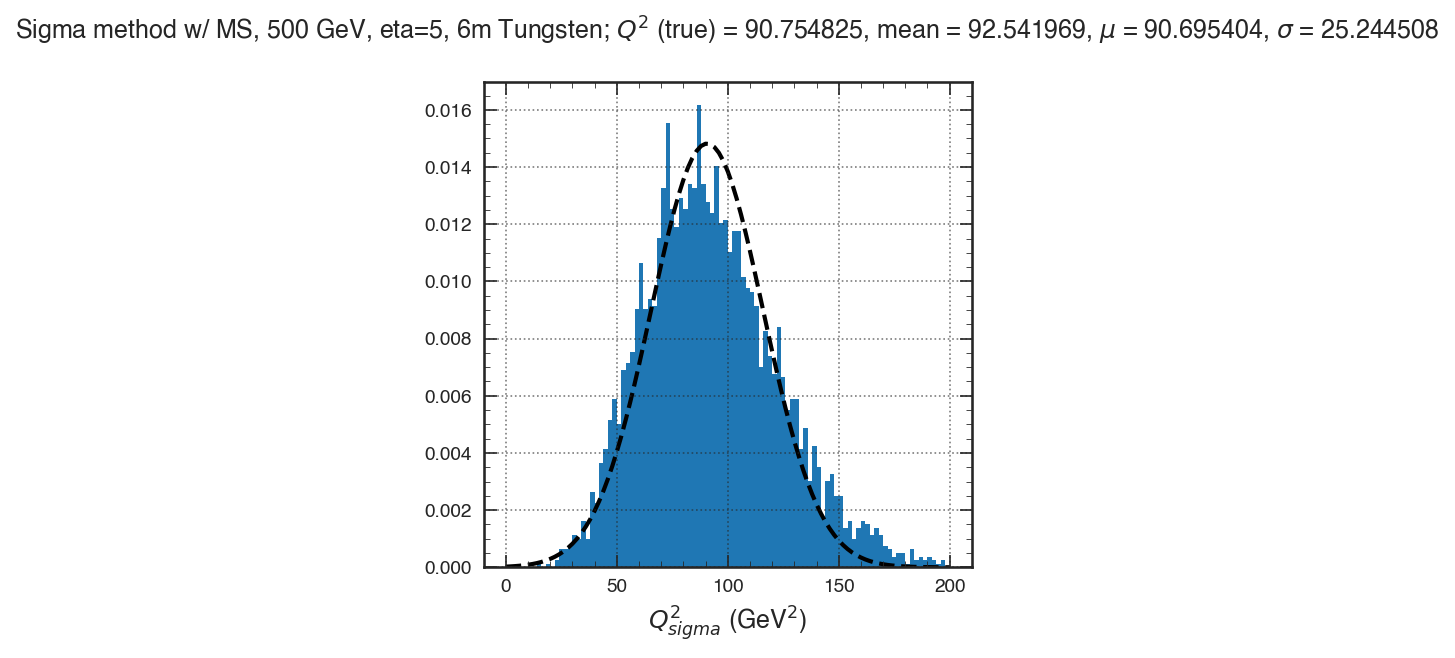

Q2 resolution = %f 0.2783438475664528


In [109]:
n, bins, patches = plt.hist(Q2Sigma500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('Sigma method w/ MS, 500 GeV, eta=5, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f, $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{sigma}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [110]:
# Now try magnetic spectrometer model

In [111]:
def SigmaMuonP(Theta, Elep):
    Bin = 4
    Rin = 0.825
    L = 5
    R = 0
    B = 0
    dThetaB = 0.0003
    # Option 1, switch for eta = 5:
#    if Theta <= 3.12812 :
#        R = -np.tan(Theta)*60
#    else :
#        R = -np.tan(Theta)*400
    # Option 2, switch for eta = 4.6:
    if Theta <= 3.12149 :
        R = -np.tan(Theta)*30
    else :
        R = -np.tan(Theta)*175
    B = Bin*Rin/R
    ThetaB = 1.2*B*L/8/Elep  
    return dThetaB/ThetaB*Elep

In [112]:
print('eta = 7, p = 900, dp =', SigmaMuonP(3.13977, 900))
print('eta = 6, p = 900, dp =', SigmaMuonP(3.136635, 900))
print('eta = 5, p = 900, dp =', SigmaMuonP(3.12812, 900))
print('eta = 4, p = 900, dp =', SigmaMuonP(3.105, 900))
print('eta = 3, p = 900, dp =', SigmaMuonP(3.0421, 900))

eta = 7, p = 900, dp = 31.31653726680989
eta = 6, p = 900, dp = 85.18220046812742
eta = 5, p = 900, dp = 231.49869120321597
eta = 4, p = 900, dp = 107.83013112651327
eta = 3, p = 900, dp = 294.02188302317774


In [113]:
# Same Q2 reco, energy loss only, but now with momentum uncertainty
##Escatt900 = 900
Escatt900 = 900-r

In [114]:
# Now smear momentum. Find sigma for each point, multiply by a normalized Gaussian and add. 
# Let's also correct back by the most probably energy loss
SigmaE900 = SigmaMuonP(3.136635, Escatt900)

In [115]:
NormGauss = np.random.normal(0, 1, Ntrial)

In [116]:
##Emeas900 = Escatt900 + SigmaE900*NormGauss
Emeas900 = Escatt900 + SigmaE900*NormGauss + Eloss1000

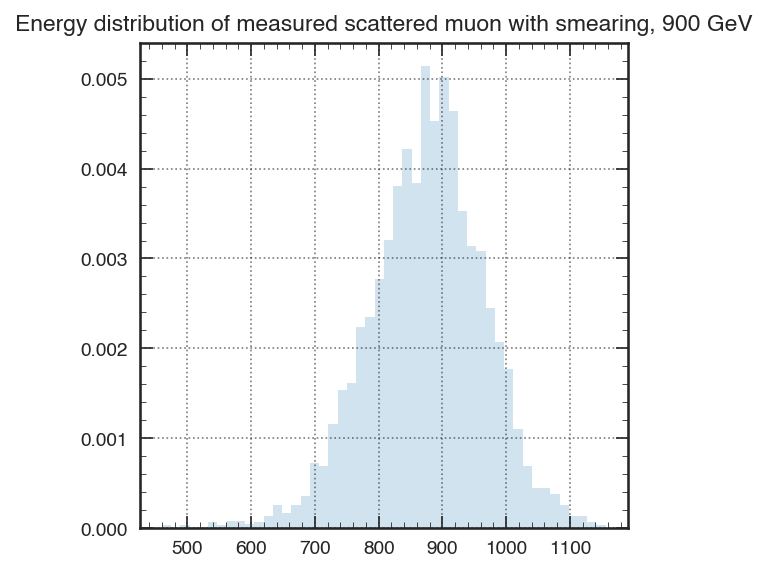

In [117]:
n, bins, patches = plt.hist(Emeas900, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('Energy distribution of measured scattered muon with smearing, 900 GeV')
plt.show()

In [118]:
# Calculate Q2 from random energy loss and measurement smearing, 
# but not yet any smearing from multiple scattering 
Q2meas900 = Q2Lepton(Emeas900,3.136635, 1000, 275)
Q2true = Q2Lepton(900., 3.136635, 1000, 275)

In [119]:
lower =0
upper = 50
fit_i = 5
fit_f = 30
fit = Q2meas900[(Q2meas900 >= fit_i) & (Q2meas900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2meas900)

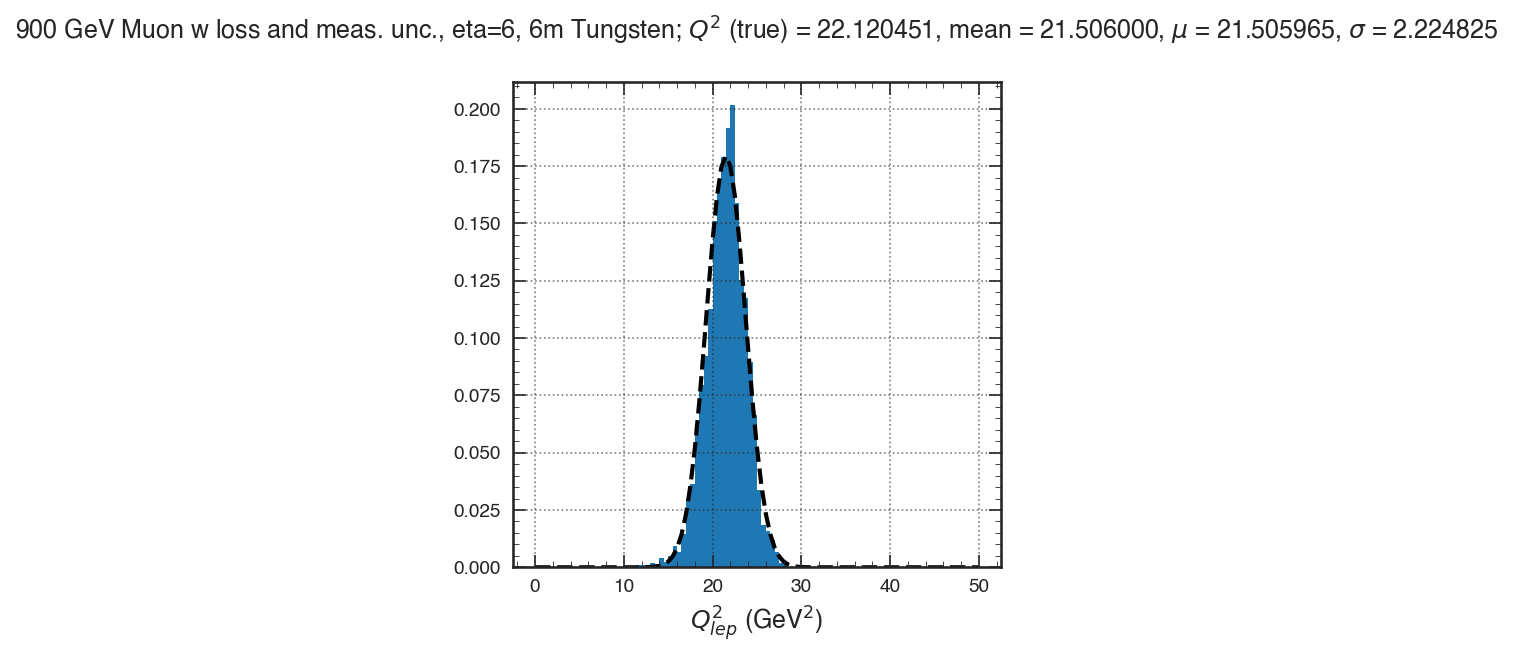

Q2 resolution = %f 0.10345152768020731


In [120]:
n, bins, patches = plt.hist(Q2meas900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('900 GeV Muon w loss and meas. unc., eta=6, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f, $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [121]:
# In this case 18% meas. uncertainty dominates, was 2.4% precision
# Would be 20% w/o E loss, worse, because higher average momentum (~95%*20 ~19% )

In [122]:
# Now 500 GeV
# Same Q2 reco, energy loss only, but now with momentum uncertainty
Escatt500 = 500-r

In [123]:
# Now smear momentum. Find sigma for each point, multiply by a normalized Gaussian and add. 
# Let's also correct back by the most probably energy loss
SigmaE500 = SigmaMuonP(3.136635, Escatt500)

In [124]:
Emeas500 = Escatt500 + SigmaE500*NormGauss + Eloss1000

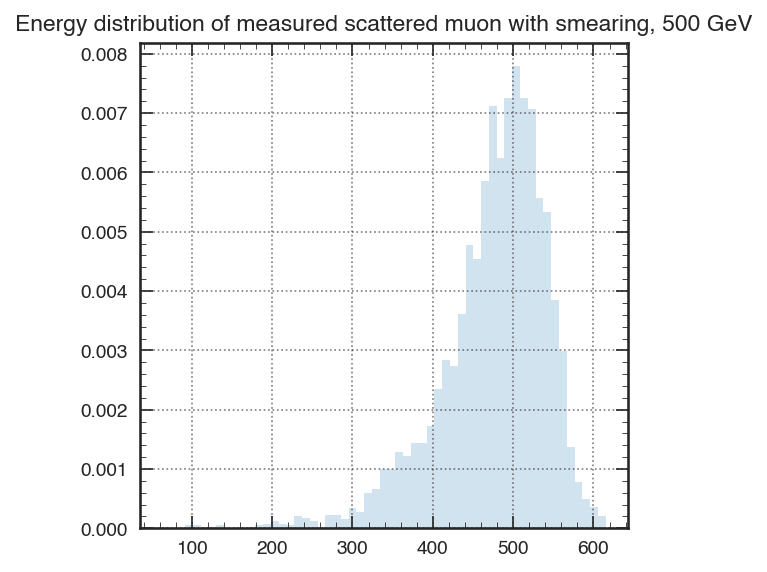

In [125]:
n, bins, patches = plt.hist(Emeas500, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('Energy distribution of measured scattered muon with smearing, 500 GeV')
plt.show()

In [126]:
# Calculate Q2 from random energy loss and measurement smearing, 
# but not yet any smearing from multiple scattering 
Q2meas500 = Q2Lepton(Emeas500,3.136635, 1000, 275)
Q2true = Q2Lepton(500., 3.136635, 1000, 275)

In [127]:
lower =5
upper = 20
fit_i = 5
fit_f = 15
fit = Q2meas500[(Q2meas500 >= fit_i) & (Q2meas500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2meas500)

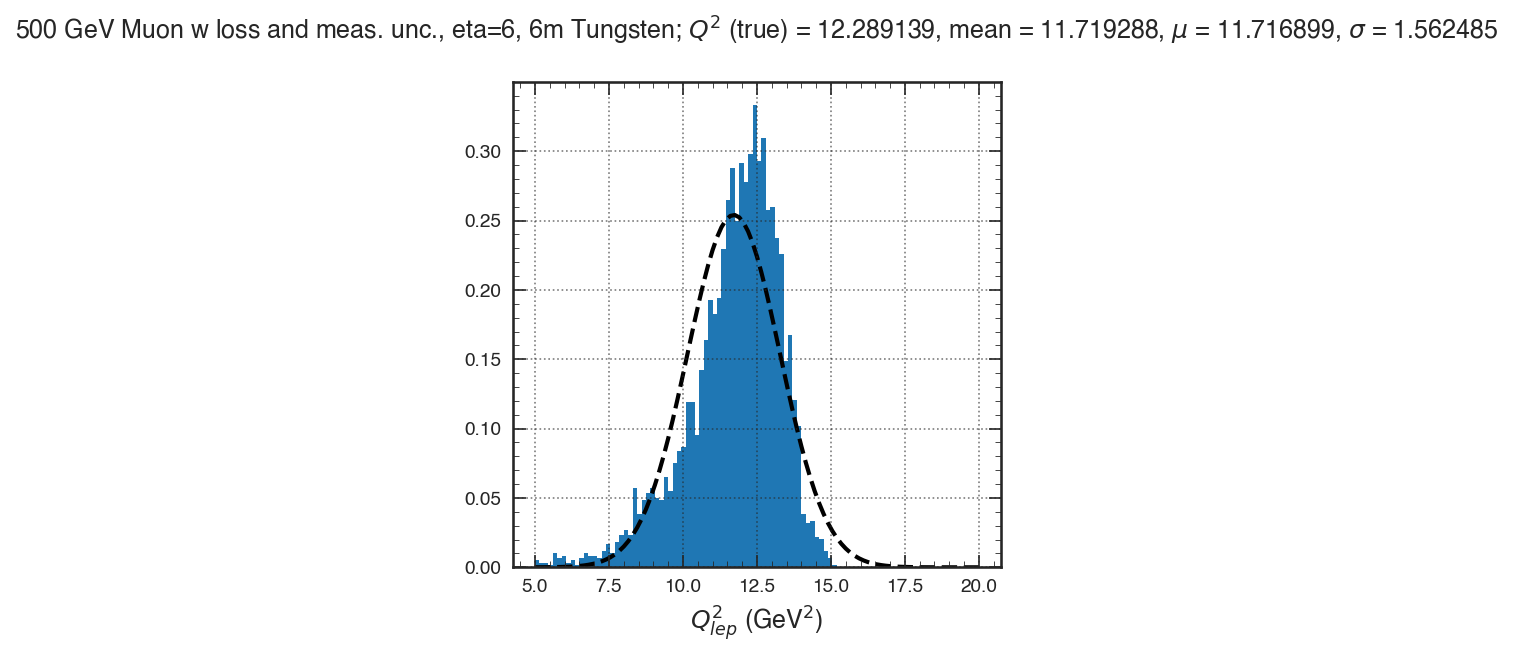

Q2 resolution = %f 0.13335315579132473


In [128]:
n, bins, patches = plt.hist(Q2meas500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('500 GeV Muon w loss and meas. unc., eta=6, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f, $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [129]:
#Lower momentum, so better resolution 13%

In [130]:
# Now add back in angular scattering
Th900 = np.random.normal(3.136635, SigmaTheta900, Ntrial)
Th500 = np.random.normal(3.136635, SigmaTheta500, Ntrial)

In [131]:
# Calculate Q2 with random energy loss and multiple scattering, but no smearing of measured muon momentum...
Q2meas900 = Q2Lepton(Emeas900,Th900, 1000, 275)
Q2true = Q2Lepton(900., 3.136635, 1000, 275)

In [132]:
lower =0
upper = 50
fit_i = 10
fit_f = 35
fit = Q2meas900[(Q2meas900 >= fit_i) & (Q2meas900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2meas900)

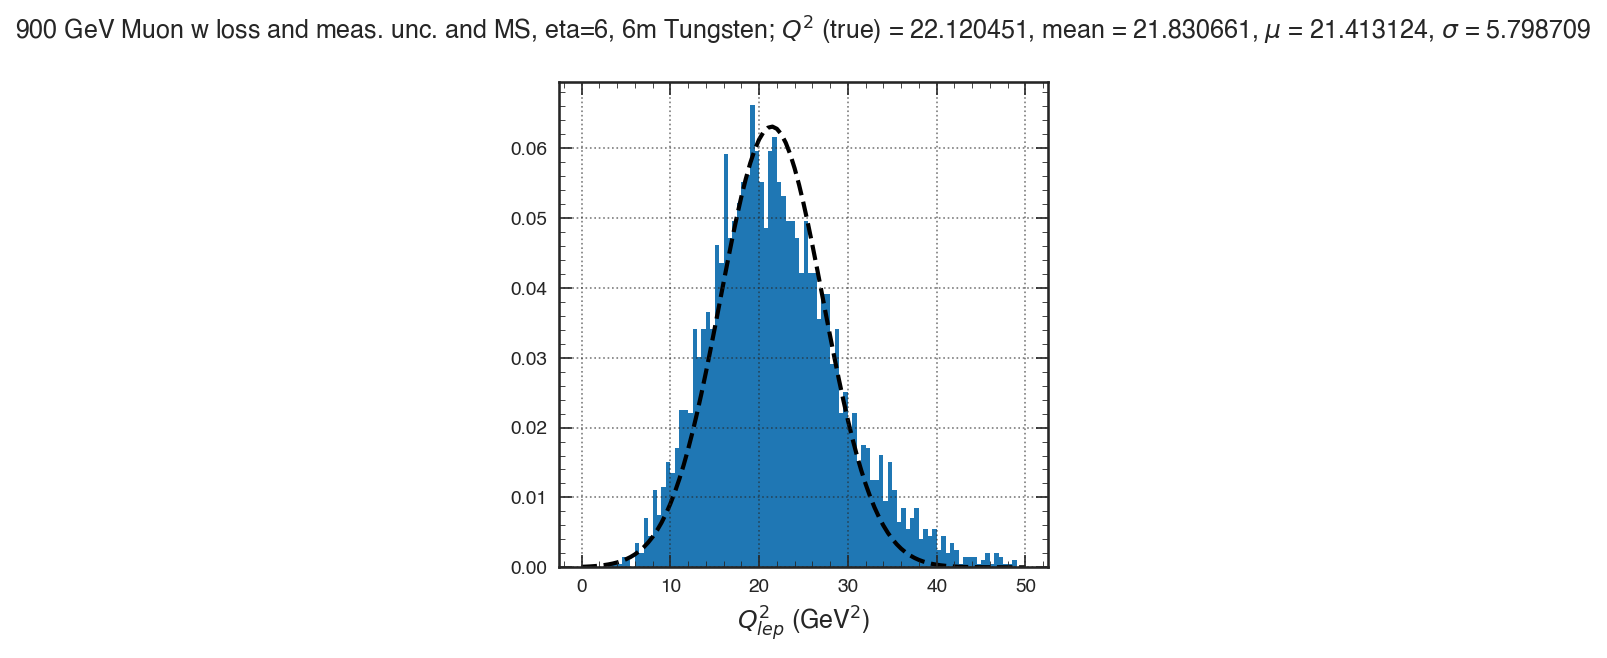

Q2 resolution = %f 0.27080164135557727


In [133]:
n, bins, patches = plt.hist(Q2meas900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('900 GeV Muon w loss and meas. unc. and MS, eta=6, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f, $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [134]:
# resolution degraded, but only from sigma ~5.5 to 6.1. Angular resolution still dominant

In [135]:
# Calculate Q2 with random energy loss and multiple scattering, but no smearing of measured muon momentum...
Q2meas500 = Q2Lepton(Emeas500,Th500, 1000, 275)
Q2true = Q2Lepton(500., 3.136635, 1000, 275)

In [136]:
lower =0
upper = 50
fit_i = 0
fit_f = 25
fit = Q2meas500[(Q2meas500 >= fit_i) & (Q2meas500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2meas500)

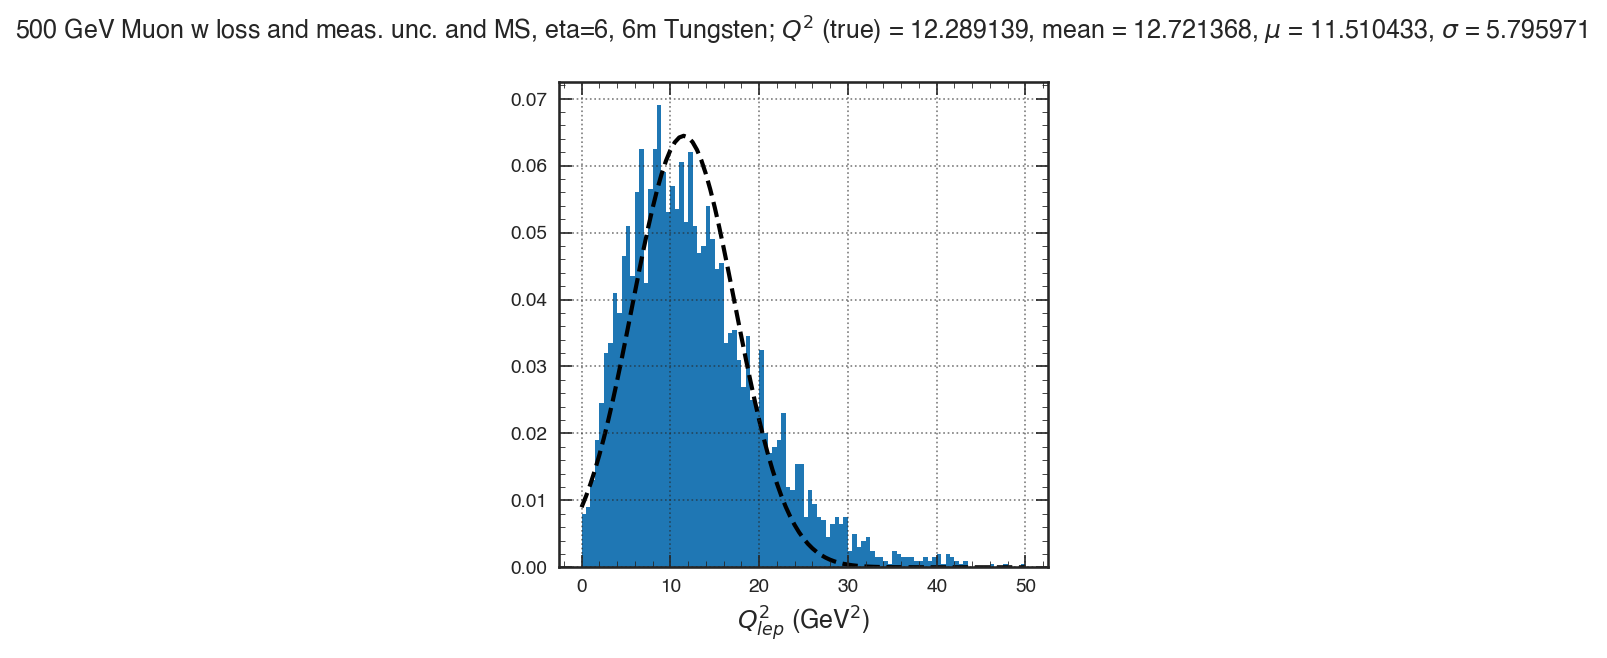

Q2 resolution = %f 0.5035406335182651


In [137]:
n, bins, patches = plt.hist(Q2meas500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('500 GeV Muon w loss and meas. unc. and MS, eta=6, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f, $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [138]:
# This is quite similar to case with no measurement smearing. So no significant degradation. 
# Of course resolution is ~50%! (all from angular smearing...)

In [139]:
# Now go to eta = 5

In [140]:
# Now add back in angular scattering
Th900 = np.random.normal(3.12812, SigmaTheta900, Ntrial)
Th500 = np.random.normal(3.12812, SigmaTheta500, Ntrial)

In [141]:
# Calculate Q2 with random energy loss and multiple scattering, but no smearing of measured muon momentum...
Q2meas900 = Q2Lepton(Emeas900,Th900, 1000, 275)
Q2true = Q2Lepton(900., 3.12812, 1000, 275)

In [142]:
lower =70
upper = 270
fit_i = 100
fit_f = 225.0
fit = Q2meas900[(Q2meas900 >= fit_i) & (Q2meas900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2meas900)

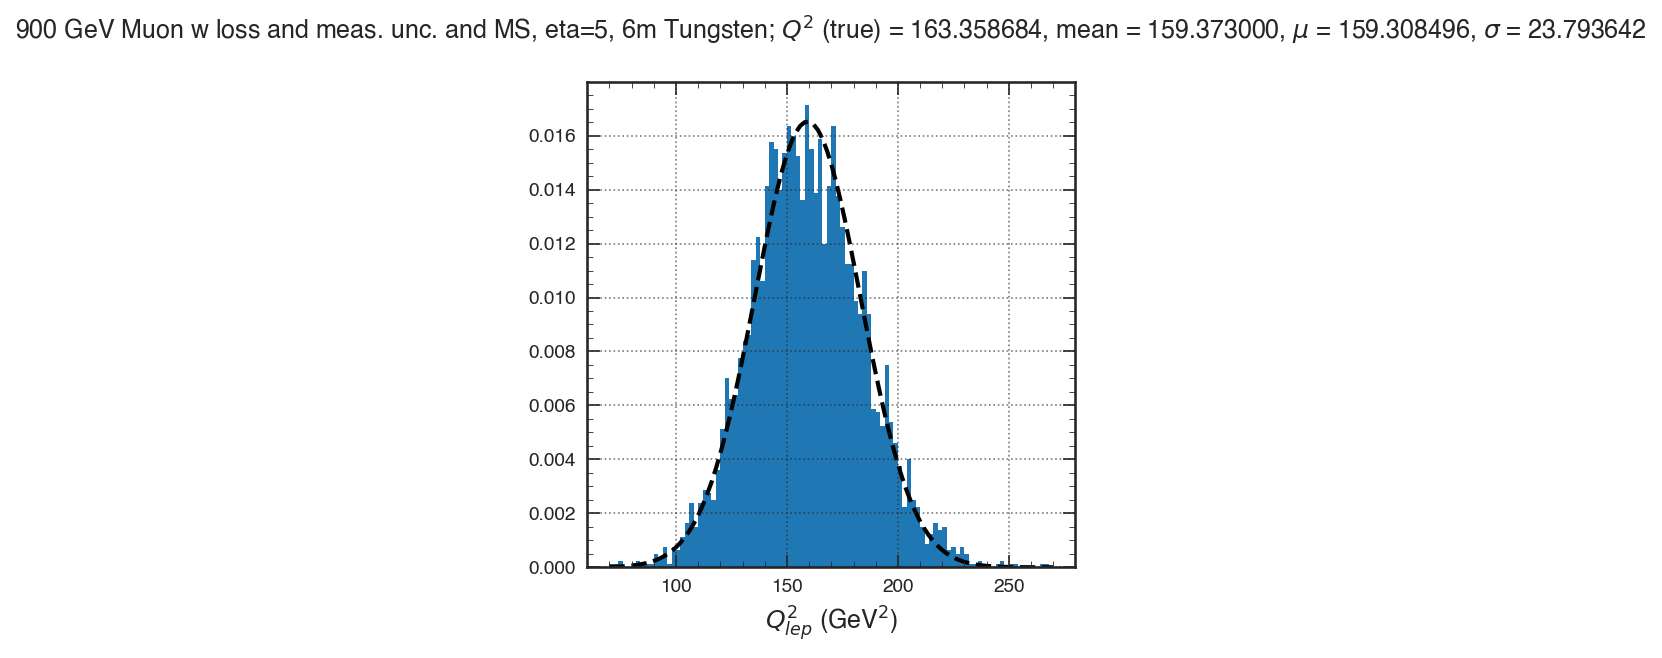

Q2 resolution = %f 0.14935576108338802


In [143]:
n, bins, patches = plt.hist(Q2meas900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('900 GeV Muon w loss and meas. unc. and MS, eta=5, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f, $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)

In [144]:
# Calculate Q2 with random energy loss and multiple scattering, but no smearing of measured muon momentum...
Q2meas500 = Q2Lepton(Emeas500,Th500, 1000, 275)
Q2true = Q2Lepton(500., 3.12812, 1000, 275)

In [145]:
lower = 0
upper = 200
fit_i = 40
fit_f = 150.0
fit = Q2meas500[(Q2meas500 >= fit_i) & (Q2meas500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2meas500)

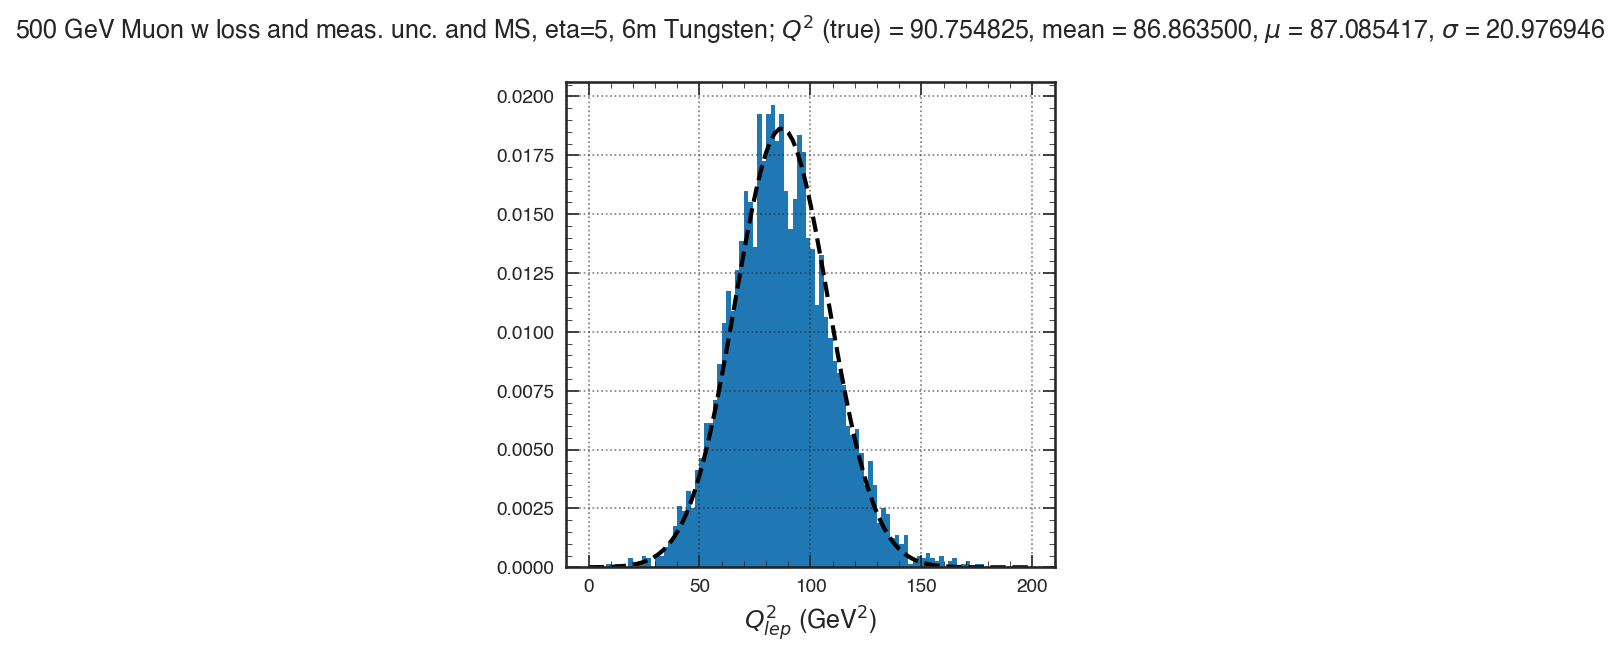

Q2 resolution = %f 0.24087782424808285


In [146]:
n, bins, patches = plt.hist(Q2meas500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('500 GeV Muon w loss and meas. unc. and MS, eta=5, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f, $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()
print('Q2 resolution = %f',sigma/mu)